In [5]:
import inspect
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [62]:
def wrangle(data,resample_rule="1W"):


    # Read results into DataFrame
    df = pd.read_csv(data).set_index("Date")
    
    
    
    #remove 
    df.drop(columns=["Open","High","Low","Adj Close","Volume"],inplace=True)
    
    
    
    df.index= pd.to_datetime(df.index)
    
    
    
    df["Close"]=df["Close"].astype(int)
    
   
                     
    df=df.squeeze()
    
    #df = df.iloc[::-1]
    
    # Resample and forward-fill
    y  = df.resample(resample_rule).mean().fillna(method="ffill")
    
    

    return y

In [63]:
y=wrangle("A.csv")
y

Date
1999-11-21    29.500000
1999-11-28    29.250000
1999-12-05    30.400000
1999-12-12    32.000000
1999-12-19    31.200000
                ...    
2020-03-08    80.600000
2020-03-15    68.400000
2020-03-22    66.600000
2020-03-29    68.400000
2020-04-05    70.333333
Freq: W-SUN, Name: Close, Length: 1064, dtype: float64

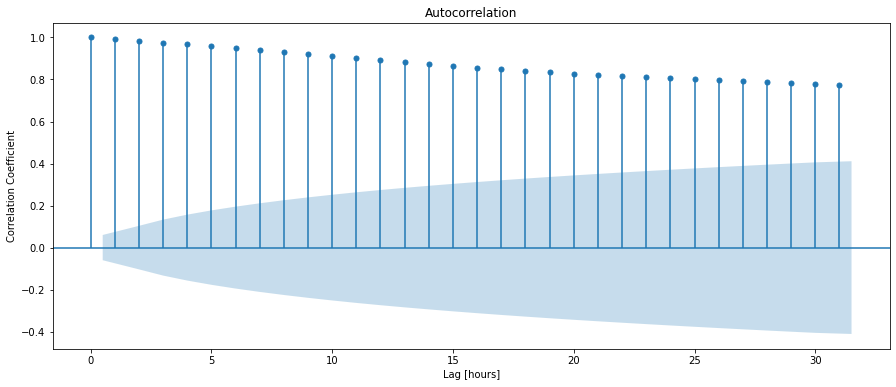

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y,ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

Text(0, 0.5, 'Correlation Coefficient')

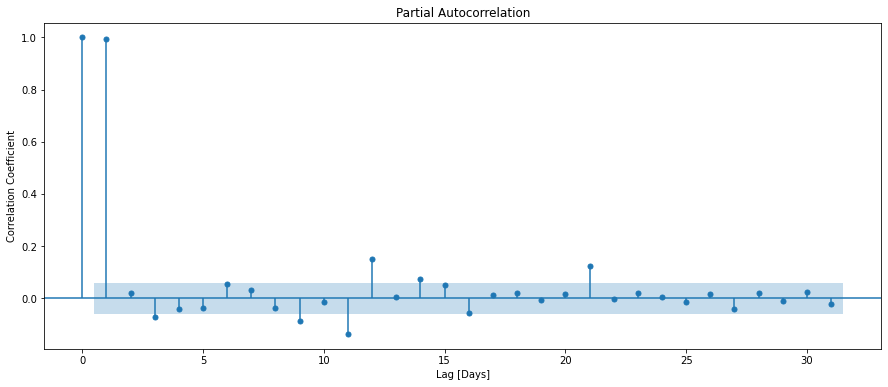

In [65]:
fig,ax=plt.subplots(figsize=(15,6))
plot_pacf(y,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient")

In [66]:
split=len(y)*0.8
split

851.2

In [67]:

y_train,y_test=train_test_split(y,test_size=0.2,shuffle=False)


In [68]:
y_train.tail()


Date
2016-02-07    36.8
2016-02-14    35.0
2016-02-21    37.0
2016-02-28    37.2
2016-03-06    38.4
Freq: W-SUN, Name: Close, dtype: float64

In [69]:
y_test.tail()

Date
2020-03-08    80.600000
2020-03-15    68.400000
2020-03-22    66.600000
2020-03-29    68.400000
2020-04-05    70.333333
Freq: W-SUN, Name: Close, dtype: float64

In [70]:
y_train_mean=y_train.mean()

y_pred_baseline=[y_train_mean]*len(y_train)

mae_baseline=mean_absolute_error(y_train,y_pred_baseline)

print("Mean Stock closing price:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Stock closing price: 26.27
Baseline MAE: 8.24


In [71]:
p_params = range(0,22,4)
q_params = range(0,3,1)

In [72]:
# Create dictionary to store MAEs
mae_grid = {}
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = []
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train,order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train,y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)
        print(mae)

print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.39 seconds.
8.239370651743187
Trained ARIMA (0, 0, 1) in 0.42 seconds.
4.5387059165831065


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Trained ARIMA (0, 0, 2) in 1.24 seconds.
3.088732547727898
Trained ARIMA (4, 0, 0) in 1.64 seconds.
1.0271732785395493
Trained ARIMA (4, 0, 1) in 2.55 seconds.
1.026960289247002


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (4, 0, 2) in 3.53 seconds.
1.0196214279959774
Trained ARIMA (8, 0, 0) in 2.89 seconds.
1.0235950044280357
Trained ARIMA (8, 0, 1) in 3.66 seconds.
1.0211252793972605


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (8, 0, 2) in 7.17 seconds.
1.0227846470463824
Trained ARIMA (12, 0, 0) in 3.3 seconds.
1.0090132982736617
Trained ARIMA (12, 0, 1) in 7.41 seconds.
1.0074808227540006
Trained ARIMA (12, 0, 2) in 7.28 seconds.
1.0076892364437602
Trained ARIMA (16, 0, 0) in 5.55 seconds.
1.008718890641937
Trained ARIMA (16, 0, 1) in 10.77 seconds.
1.010156911674133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (16, 0, 2) in 14.58 seconds.
1.0316950353518488
Trained ARIMA (20, 0, 0) in 11.81 seconds.
1.021268152105155
Trained ARIMA (20, 0, 1) in 17.92 seconds.
1.0323571884564147


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (20, 0, 2) in 26.28 seconds.
1.0467493242870822
{0: [8.239370651743187, 4.5387059165831065, 3.088732547727898], 4: [1.0271732785395493, 1.026960289247002, 1.0196214279959774], 8: [1.0235950044280357, 1.0211252793972605, 1.0227846470463824], 12: [1.0090132982736617, 1.0074808227540006, 1.0076892364437602], 16: [1.008718890641937, 1.010156911674133, 1.0316950353518488], 20: [1.021268152105155, 1.0323571884564147, 1.0467493242870822]}


In [73]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,4,8,12,16,20
0,8.2394,1.0272,1.0236,1.0090,1.0087,1.0213
1,4.5387,1.0270,1.0211,1.0075,1.0102,1.0324
2,3.0887,1.0196,1.0228,1.0077,1.0317,1.0467


<AxesSubplot:>

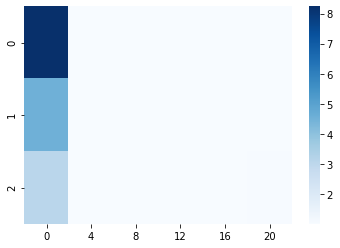

In [74]:
sns.heatmap(mae_df,cmap="Blues")

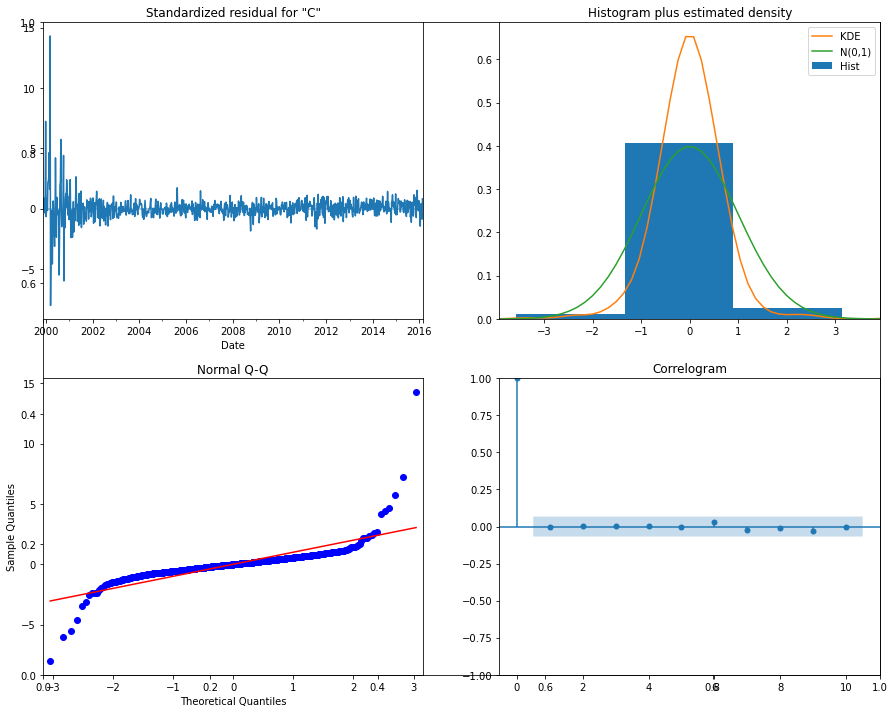

In [75]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

In [76]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history,order=(12,0,2)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

<ipython-input-76-6d3af9170416>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\P

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [77]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)

print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 1.52


In [78]:
df_predictions = pd.DataFrame({"y_test":y_test,"y_pred_wfv":y_pred_wfv})
fig = px.line(df_predictions,labels={"value":"price"})
fig.show()

In [83]:
model.forecast(5)

2020-04-05    66.942063
2020-04-12    67.306661
2020-04-19    67.798829
2020-04-26    68.298042
2020-05-03    67.990295
Freq: W-SUN, Name: predicted_mean, dtype: float64